# NNs in Sklearn

## Regression
Check out the documentation for the MLPRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

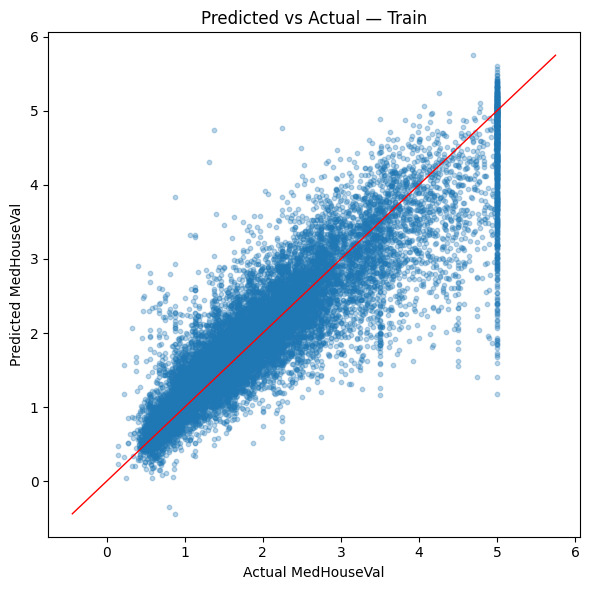

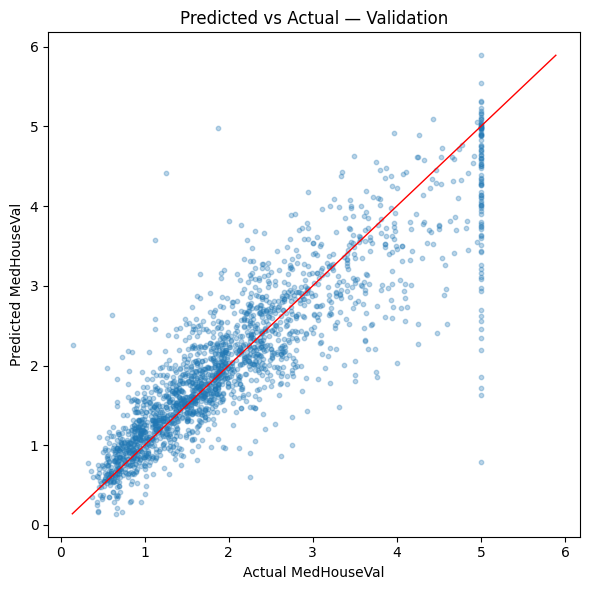

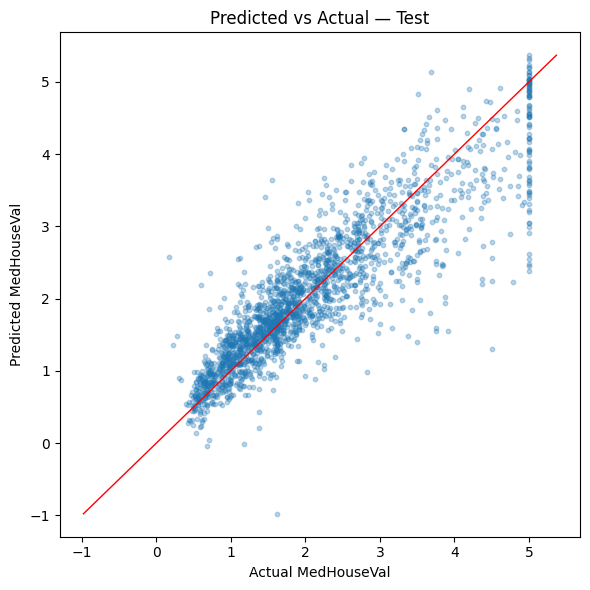

In [3]:
# Basic Regression Tutorial: California Housing + MLPRegressor (defaults)

import warnings
warnings.filterwarnings("ignore")  # keep output clean; MLP may warn about convergence

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load data
data = fetch_california_housing(as_frame=True)
print(data.DESCR)  # dataset description
X = data.frame.drop(columns=["MedHouseVal"])
y = data.frame["MedHouseVal"]

# 2) 80/10/10 split (train / val / test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# 3) Scale features with train-only statistics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# 4) Default MLPRegressor (hidden_layer_sizes=(100,), max_iter=200, etc.)
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train_scaled, y_train)

# 5) Predict on all splits
y_pred_train = mlp.predict(X_train_scaled)
y_pred_val   = mlp.predict(X_val_scaled)
y_pred_test  = mlp.predict(X_test_scaled)

# 6) Metrics helper
def metrics_row(name, y_true, y_pred):
    return {
        "split": name,
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
    }

metrics_df = pd.DataFrame([
    metrics_row("train", y_train, y_pred_train),
    metrics_row("val",   y_val,   y_pred_val),
    metrics_row("test",  y_test,  y_pred_test),
])

print("=== Metrics (defaults) ===")
print(metrics_df.to_string(index=False))

# 7) Scatterplots: predicted vs actual (one figure per split; y=x reference line)
def scatter_with_reference(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.3, s=10)
    lo = min(np.min(y_true), np.min(y_pred))
    hi = max(np.max(y_true), np.max(y_pred))
    plt.plot([lo, hi], [lo, hi], linewidth=1, color='red')  # reference line
    plt.xlabel("Actual MedHouseVal")
    plt.ylabel("Predicted MedHouseVal")
    plt.title(title)
    plt.tight_layout()
    plt.show()

scatter_with_reference(y_train, y_pred_train, "Predicted vs Actual — Train")
scatter_with_reference(y_val,   y_pred_val,   "Predicted vs Actual — Validation")
scatter_with_reference(y_test,  y_pred_test,  "Predicted vs Actual — Test")